In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [30]:
df= pd.DataFrame({'Name':['akshu','pinu','tinu','chinu','pintu','chintu','nilu','gomya','chimya','ashu','sonu','monu','aishu','vaishu','akshu','lalu','bhalu''chiku','ranu','nalu','deepu','domu','molu'],'Age':[27,29,29,28,42,39,41,38,36,35,37,26,27,28,29,32,40,41,43,39,31,39],'Income($)':[70000,90000,61000,60000,150000,155000,160000,162000,156000,130000,137000,45000,48000,51000,49500,53000,65000,63000,64000,80000,82000,58000]})

In [31]:
df.head()

,Name,Age,Income($)
0,akshu,27,70000
1,pinu,29,90000
2,tinu,29,61000
3,chinu,28,60000
4,pintu,42,150000


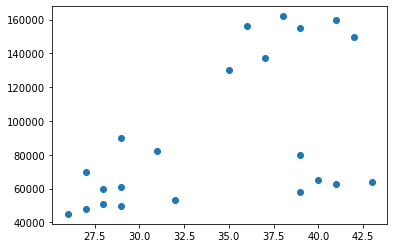

In [32]:
plt.scatter(df.Age,df['Income($)'])

In [33]:
km=KMeans(n_clusters=3)

In [34]:
y_predict=km.fit_predict(df[['Income($)']])

In [35]:
y_predict

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [36]:
df['cluster']=y_predict
df.head()

,Name,Age,Income($),cluster
0,akshu,27,70000,2
1,pinu,29,90000,2
2,tinu,29,61000,1
3,chinu,28,60000,1
4,pintu,42,150000,0


In [37]:
sc= MinMaxScaler()

In [38]:
df['Income($)']=sc.fit_transform(df[["Income($)"]])   
df['Age']=sc.fit_transform(df[["Age"]])

In [39]:
df.head()

,Name,Age,Income($),cluster
0,akshu,0.058824,0.213675,2
1,pinu,0.176471,0.384615,2
2,tinu,0.176471,0.136752,1
3,chinu,0.117647,0.128205,1
4,pintu,0.941176,0.897436,0


In [44]:
km= KMeans(n_clusters=3)

In [46]:
y_pre=km.fit_predict(df[["Age","Income($)"]])
y_pre

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2])

In [56]:
df['cluster']=y_pre
df

,Name,Age,Income($),cluster
0,akshu,0.058824,0.213675,0
1,pinu,0.176471,0.384615,0
2,tinu,0.176471,0.136752,0
3,chinu,0.117647,0.128205,0
4,pintu,0.941176,0.897436,1
5,chintu,0.764706,0.940171,1
6,nilu,0.882353,0.982906,1
7,gomya,0.705882,1.000000,1
8,chimya,0.588235,0.948718,1
9,ashu,0.529412,0.726496,1


In [57]:
df1= df[df.cluster==0]
df2= df[df.cluster==1]
df3= df[df.cluster==2]

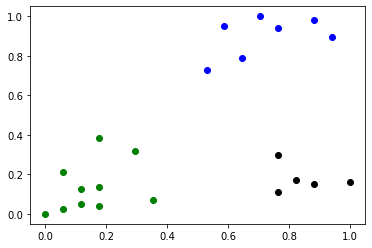

In [58]:
plt.scatter(df1.Age,df1["Income($)"], color="green")
plt.scatter(df2.Age,df2["Income($)"],color="blue")
plt.scatter(df3.Age,df3["Income($)"], color="black")

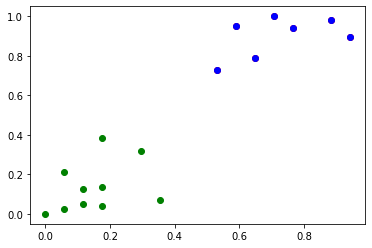

In [55]:
plt.scatter(df1.Age,df1['Income($)'], color="green")
plt.scatter(df2.Age,df2['Income($)'],color="red")
plt.scatter(df3.Age, df3["Income($)"], color="blue")
plt.show()

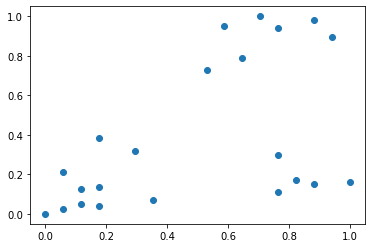

In [54]:
plt.scatter(df.Age,df["Income($)"])

In [59]:
km.cluster_centers_

array([[0.15294118, 0.13632479],
       [0.72268908, 0.8974359 ],
       [0.84705882, 0.17948718]])

In [62]:
sse=[]
k_rng= range(1,10)
for k in k_rng:
    km= KMeans(n_clusters=k)
    km.fit(df[["Age","Income($)"]])
    sse.append(km.inertia_)

In [63]:
sse

[5.336496570182581,
 2.065078551692429,
 0.5165671472853622,
 0.38501236009609285,
 0.25903871968273984,
 0.20319049717062324,
 0.16563192654045295,
 0.13354151810995335,
 0.10407941790287337]

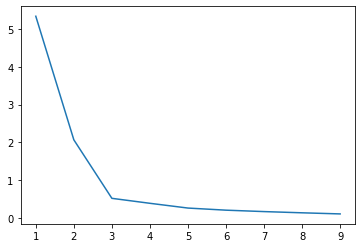

In [64]:
plt.plot(k_rng,sse)